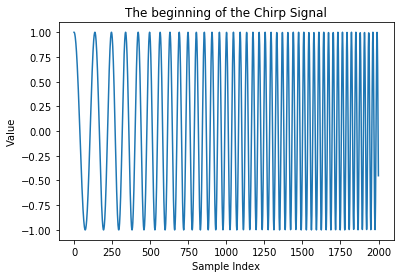

In [40]:
from scipy.signal import chirp
import scipy.io.wavfile as wav
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import Audio

samplerate=16000 #sampling frequency in Hz
t1=2.0 #End time
f0=100 #start frequency in Hz
f1=8000 #end frequency in Hz
t=np.linspace(0,t1,int(t1*samplerate)) #sample times
chirpsig=chirp(t, f0, t1, f1)
wav.write("chirp.wav",samplerate,np.int16(chirpsig*2**14))

plt.plot(chirpsig[0:2000])
plt.title('The beginning of the Chirp Signal')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

Audio("chirp.wav")

In [52]:
chirpsigdownsampled=chirpsig[::2]
wav.write("chirpdownsampled.wav",int(samplerate/2),np.int16(chirpsigdownsampled*2**14))
# wav.write("chirp.wav",samplerate,np.int16(chirpsig*2**14))
Audio("chirpdownsampled.wav")


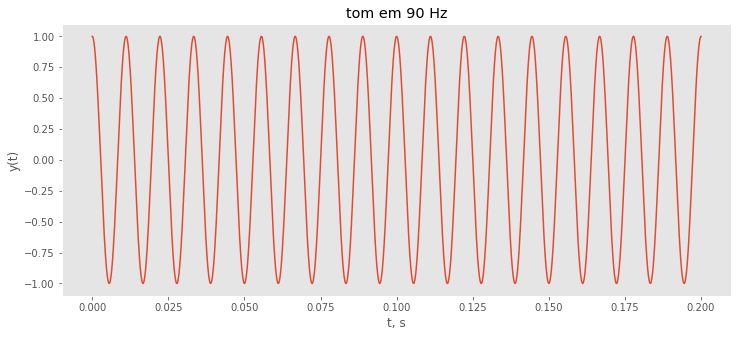

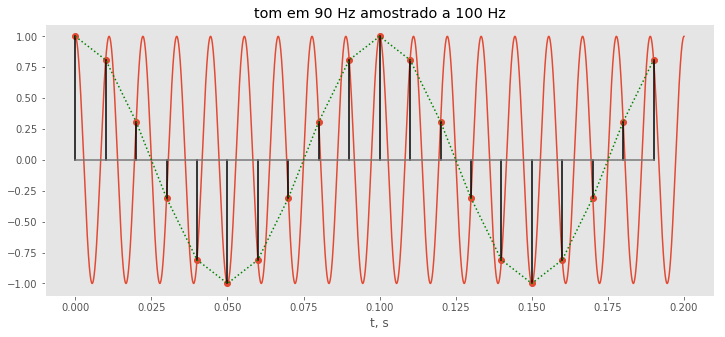

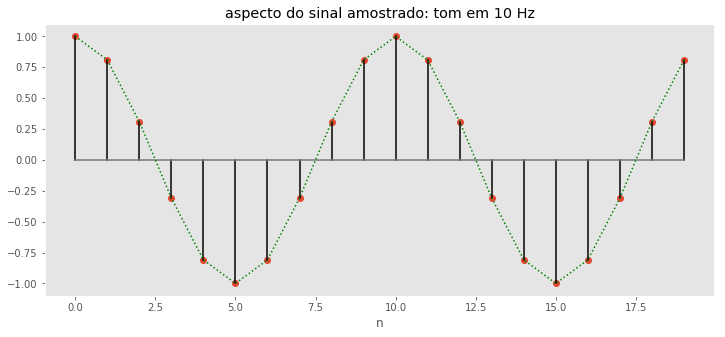

In [79]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def requantiza(sinal, nbits, B):
  """
  Requantiza sinal amostrado originalmente com nbits
  no sinal y representado com B bits
    input:
        sinal: sinal original (assume-se media em torno de zero)
        nbits: no. de bits da amostragem original
        B: no. de bits da reamostragem
    output:
        y: sinal requantizado em B bits

  Exemplo:
  p = np.arange(-1,1,.1)
  y0 = requantiza(p, 32, 1)
  y1 = requantiza(p, 32, 2)
  y2 = requantiza(p, 32, 4)
  y3 = requantiza(p, 32, 8)

  IS-25jan2017
  """
  if B >= nbits: # nada a fazer
      y = sinal
      return y

  M = 2**(nbits-1)
  Q = 2**(B-1)
  if max(sinal) - min(sinal) < 2: # sinal normalizado
      sinal2 = sinal * M
      if max(sinal2) > M:
          print('Checar sinal');
          return Null;

  sinal2 = np.floor(sinal2);
  y = np.floor(sinal2/M*Q);
  y = y/Q;
  return y
  
  y = requantiza(p, 16, 2);
  
  

# geracao de forma de onda
fs = 44100  # freq de amostragem
T = 0.2     # duracao em segundos
t = np.arange(fs*T)/fs  # eixo do tempo
f1 = 90  # feq do sinal original

# signal original
y = np.cos(2*np.pi*f1*t)
plt.figure(figsize=(12,5))
plt.plot(t, y)
plt.title('tom em ' + str(f1) + ' Hz')
plt.xlabel('t, s')
plt.ylabel('y(t)')
plt.grid()
plt.show()

# frequência de amostragem de y(t)
f2 = 100
nf2 = np.floor(fs/f2) # no. amostras em 1/f2
# sinal y amostrado a f2, Hz
y2 = y[::int(nf2)]
t2 = t[::int(nf2)]

plt.figure(figsize=(12,5))
plt.plot(t, y)
plt.title('y(t)')
plt.xlabel('t, s')
plt.grid()
# sinal discreto no tempo
plt.stem(t2, y2, 'k')
plt.plot(t2, y2, 'g:')
plt.title('tom em ' + str(f1) + ' Hz amostrado a ' + str(f2) + ' Hz')
plt.show()

# sinal efetivamente obtido da amostragem errônea
plt.figure(figsize=(12,5))
n = range(len(y2))
plt.stem(n, y2, 'k')
plt.plot(n, y2, 'g:')
plt.title('aspecto do sinal amostrado: tom em ' + str(abs(f1-f2)) + ' Hz')
plt.xlabel('n')
plt.grid()
plt.show()

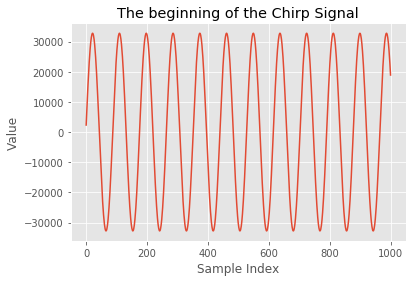

In [34]:
def genlin(td, fi, ff, fs):
    """
    Geracao de tom de frequencia variavel linearmente
    sinal = genlin(td, fi, ff, fs)
    td: duracao do tom em segundos, ex. 10 s
    fi: freq. inicial (fi < fs/2), ex. 100 Hz
    ff: freq. final (ff < fs/2), ex. 12000 Hz
    fs: freq. de amostragem, ex. 44100 Hz
    sinal: sinal gerado
    """
    t = np.arange(0,1,1.0/(td*fs))
    if fi <= ff:
        freqlin = fi + (ff-fi)*t
    else:
        freqlin = fi - (fi-ff)*t
    sinal = freqgen(freqlin, fs) # funcao definida a seguir
    return sinal

def freqgen(fr, fs):
    """
    Geracao de tom de frequencia variavel dada por fr
    Amplitude unitária e gerado via sin()
    """
    fr = fr*2*np.pi/fs # normalizacao para rad/s
    phi = np.cumsum(fr) # soma acumulada
    sinal = np.sin(phi)
    return sinal

fs = 44100
sinal1 = genlin(4, 500, 1500, fs)

# salvando em disco sob fname
fname = 'genlin.wav'
K = 2**15 - 1 # short: 16 bits
samples = np.floor(sinal1*K)
samples = samples.astype(np.short)
import scipy.io.wavfile as wav
wav.write(fname, fs, samples)
from IPython.display import Audio
plt.plot(samples[0:1000])
plt.title('The beginning of the Chirp Signal')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

Audio(fname)



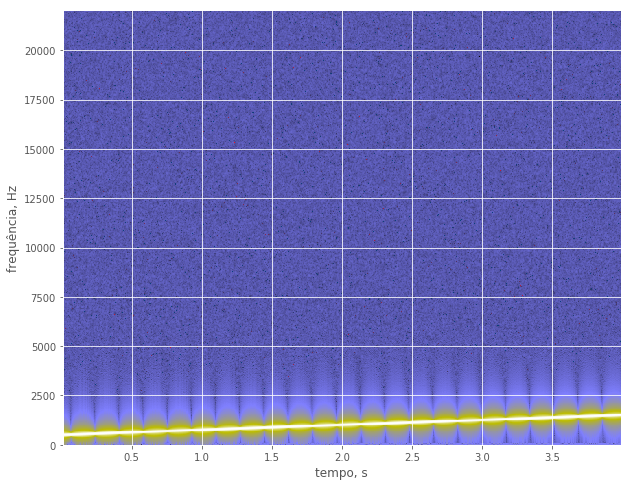

In [35]:

# espectrograma
#from scipy.io import wavfile
#fs, samples = wavefile.read(fname)
nfft = 1024
plt.figure(figsize=(10,8))
opxx, freqs, bins, im = plt.specgram(samples, nfft, fs, noverlap=7*nfft/8,
                                     cmap=plt.cm.gist_stern)
plt.xlabel('tempo, s')
plt.ylabel('frequência, Hz')
axes = plt.gca()
axes.set_ylim([0, fs/2])
plt.show()